In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [10]:
df = pd.read_csv ('data.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.drop(columns='id', inplace=True)

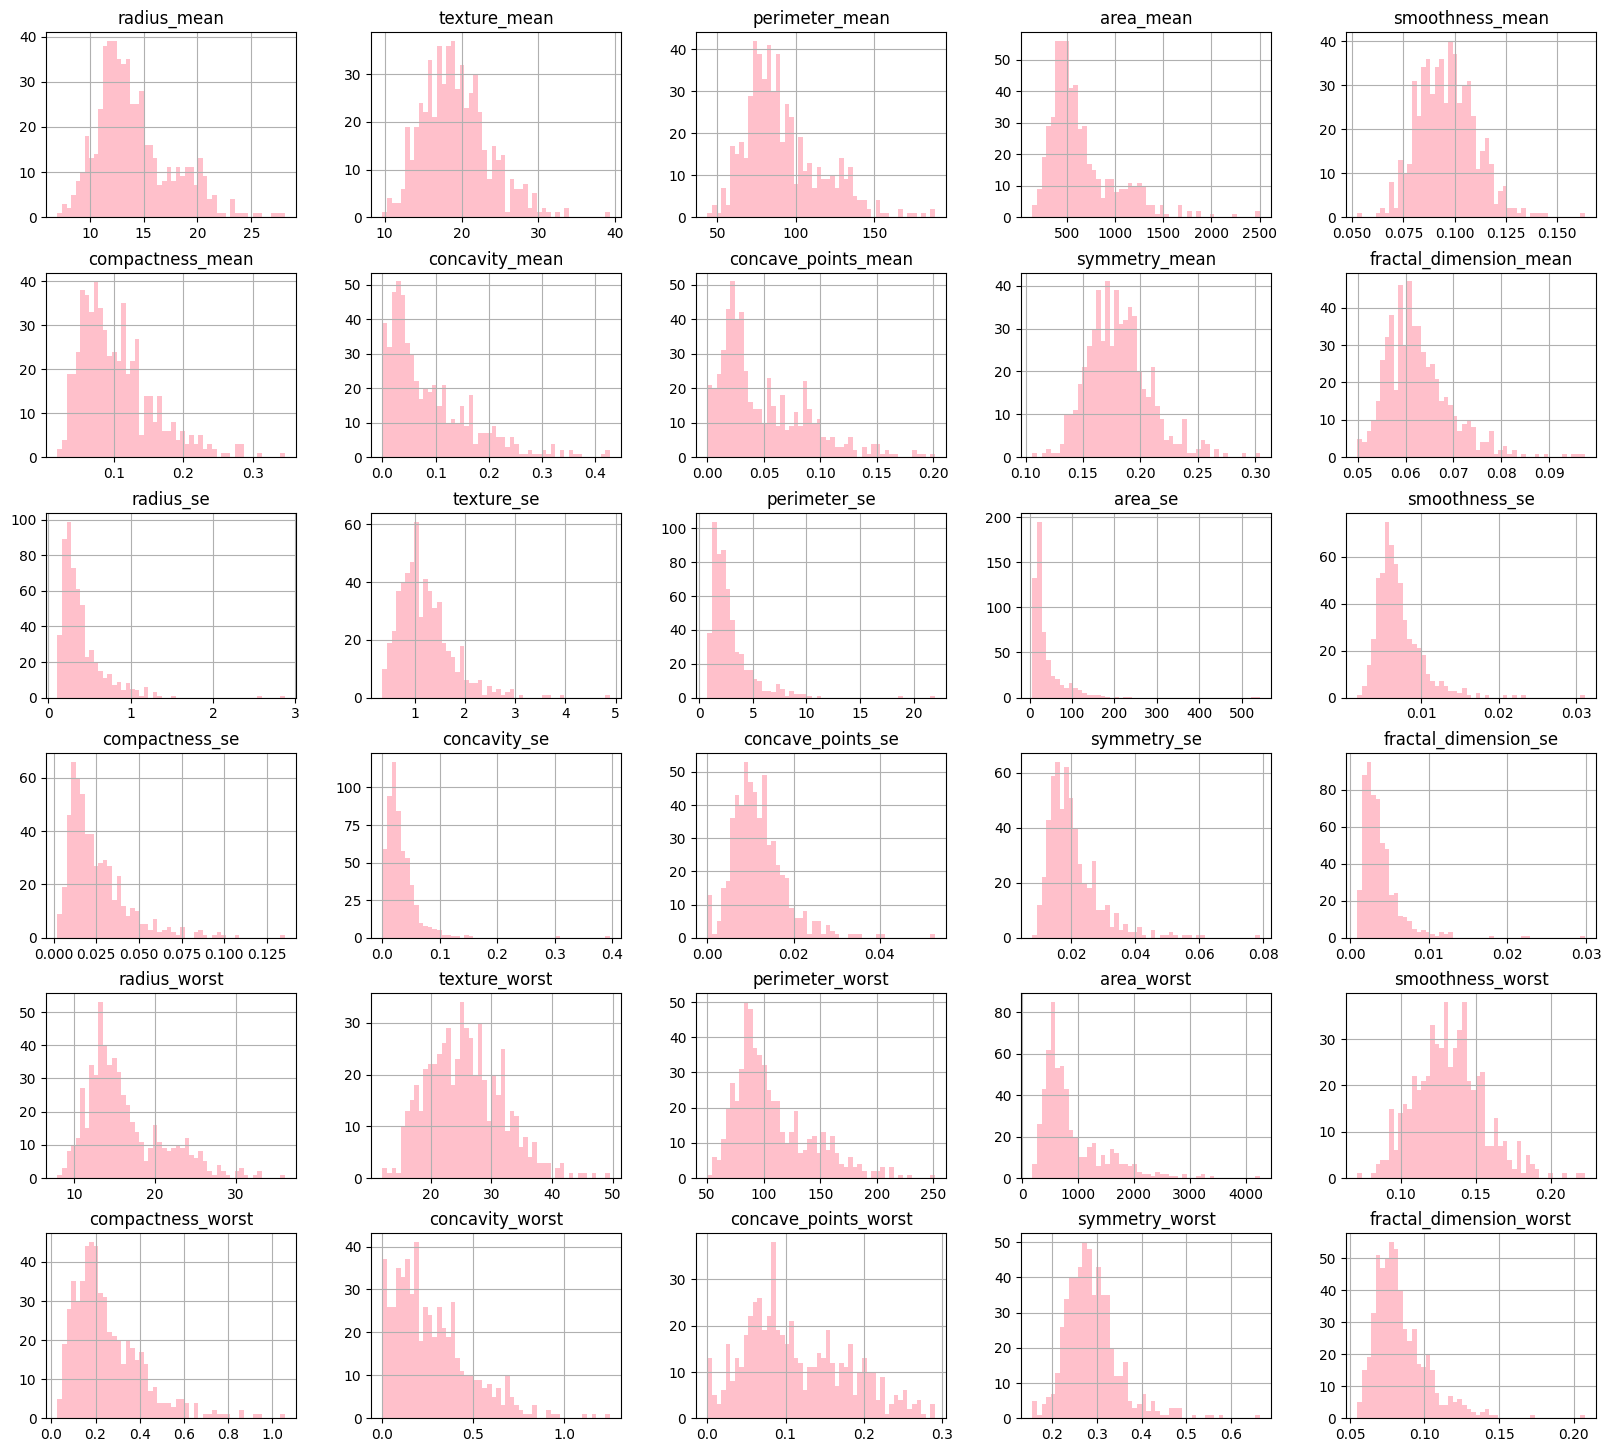

In [14]:
df.hist(bins=50, figsize=(20, 18), color='pink');

In [19]:
!pip show matplotlib

Name: matplotlib
Version: 3.9.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: Unknown <matplotlib-users@python.org>
License: License agreement for matplotlib versions 1.3.0 and later

1. This LICENSE AGREEMENT is between the Matplotlib Development Team
("MDT"), and the Individual or Organization ("Licensee") accessing and
otherwise using matplotlib software in source or binary form and its
associated documentation.

2. Subject to the terms and conditions of this License Agreement, MDT
hereby grants Licensee a nonexclusive, royalty-free, world-wide license
to reproduce, analyze, test, perform and/or display publicly, prepare
derivative works, distribute, and otherwise use matplotlib
alone or in any derivative version, provided, however, that MDT's
License Agreement and MDT's notice of copyright, i.e., "Copyright (c)
2012- Matplotlib Development Team; All Rights Reserved" are retained in
matplotlib  alone or in

In [21]:
#df_baru = []
def outlier(data):
    columns = df.select_dtypes(include=['int', 'float']).columns
    outlier_counts = {}
    for x in columns:
        Q1 = data[x].quantile(0.25)
        Q3 = data[x].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 -1.5*IQR
        upper_bound = Q3+1.5*IQR
        outliers = data[(data[x] < lower_bound) | (data[x] > upper_bound)]
        outlier_counts[x] = len (outliers)

    return outlier_counts
outlier_counts = outlier(df)
print(f'jumlah daftar oulier ; {outlier_counts}')


jumlah daftar oulier ; {'radius_mean': 14, 'texture_mean': 7, 'perimeter_mean': 13, 'area_mean': 25, 'smoothness_mean': 6, 'compactness_mean': 16, 'concavity_mean': 18, 'concave_points_mean': 10, 'symmetry_mean': 15, 'fractal_dimension_mean': 15, 'radius_se': 38, 'texture_se': 20, 'perimeter_se': 38, 'area_se': 65, 'smoothness_se': 30, 'compactness_se': 28, 'concavity_se': 22, 'concave_points_se': 19, 'symmetry_se': 27, 'fractal_dimension_se': 28, 'radius_worst': 17, 'texture_worst': 5, 'perimeter_worst': 15, 'area_worst': 35, 'smoothness_worst': 7, 'compactness_worst': 16, 'concavity_worst': 12, 'concave_points_worst': 0, 'symmetry_worst': 23, 'fractal_dimension_worst': 24}


In [22]:
def remove_outlier(data):
    columns = data.select_dtypes(include=['int', 'float']).columns
    cleaned_data = data.copy()
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
    return cleaned_data
df_cleaned = remove_outlier(df)

In [23]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 6 to 566
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                398 non-null    object 
 1   radius_mean              398 non-null    float64
 2   texture_mean             398 non-null    float64
 3   perimeter_mean           398 non-null    float64
 4   area_mean                398 non-null    float64
 5   smoothness_mean          398 non-null    float64
 6   compactness_mean         398 non-null    float64
 7   concavity_mean           398 non-null    float64
 8   concave_points_mean      398 non-null    float64
 9   symmetry_mean            398 non-null    float64
 10  fractal_dimension_mean   398 non-null    float64
 11  radius_se                398 non-null    float64
 12  texture_se               398 non-null    float64
 13  perimeter_se             398 non-null    float64
 14  area_se                  398 no

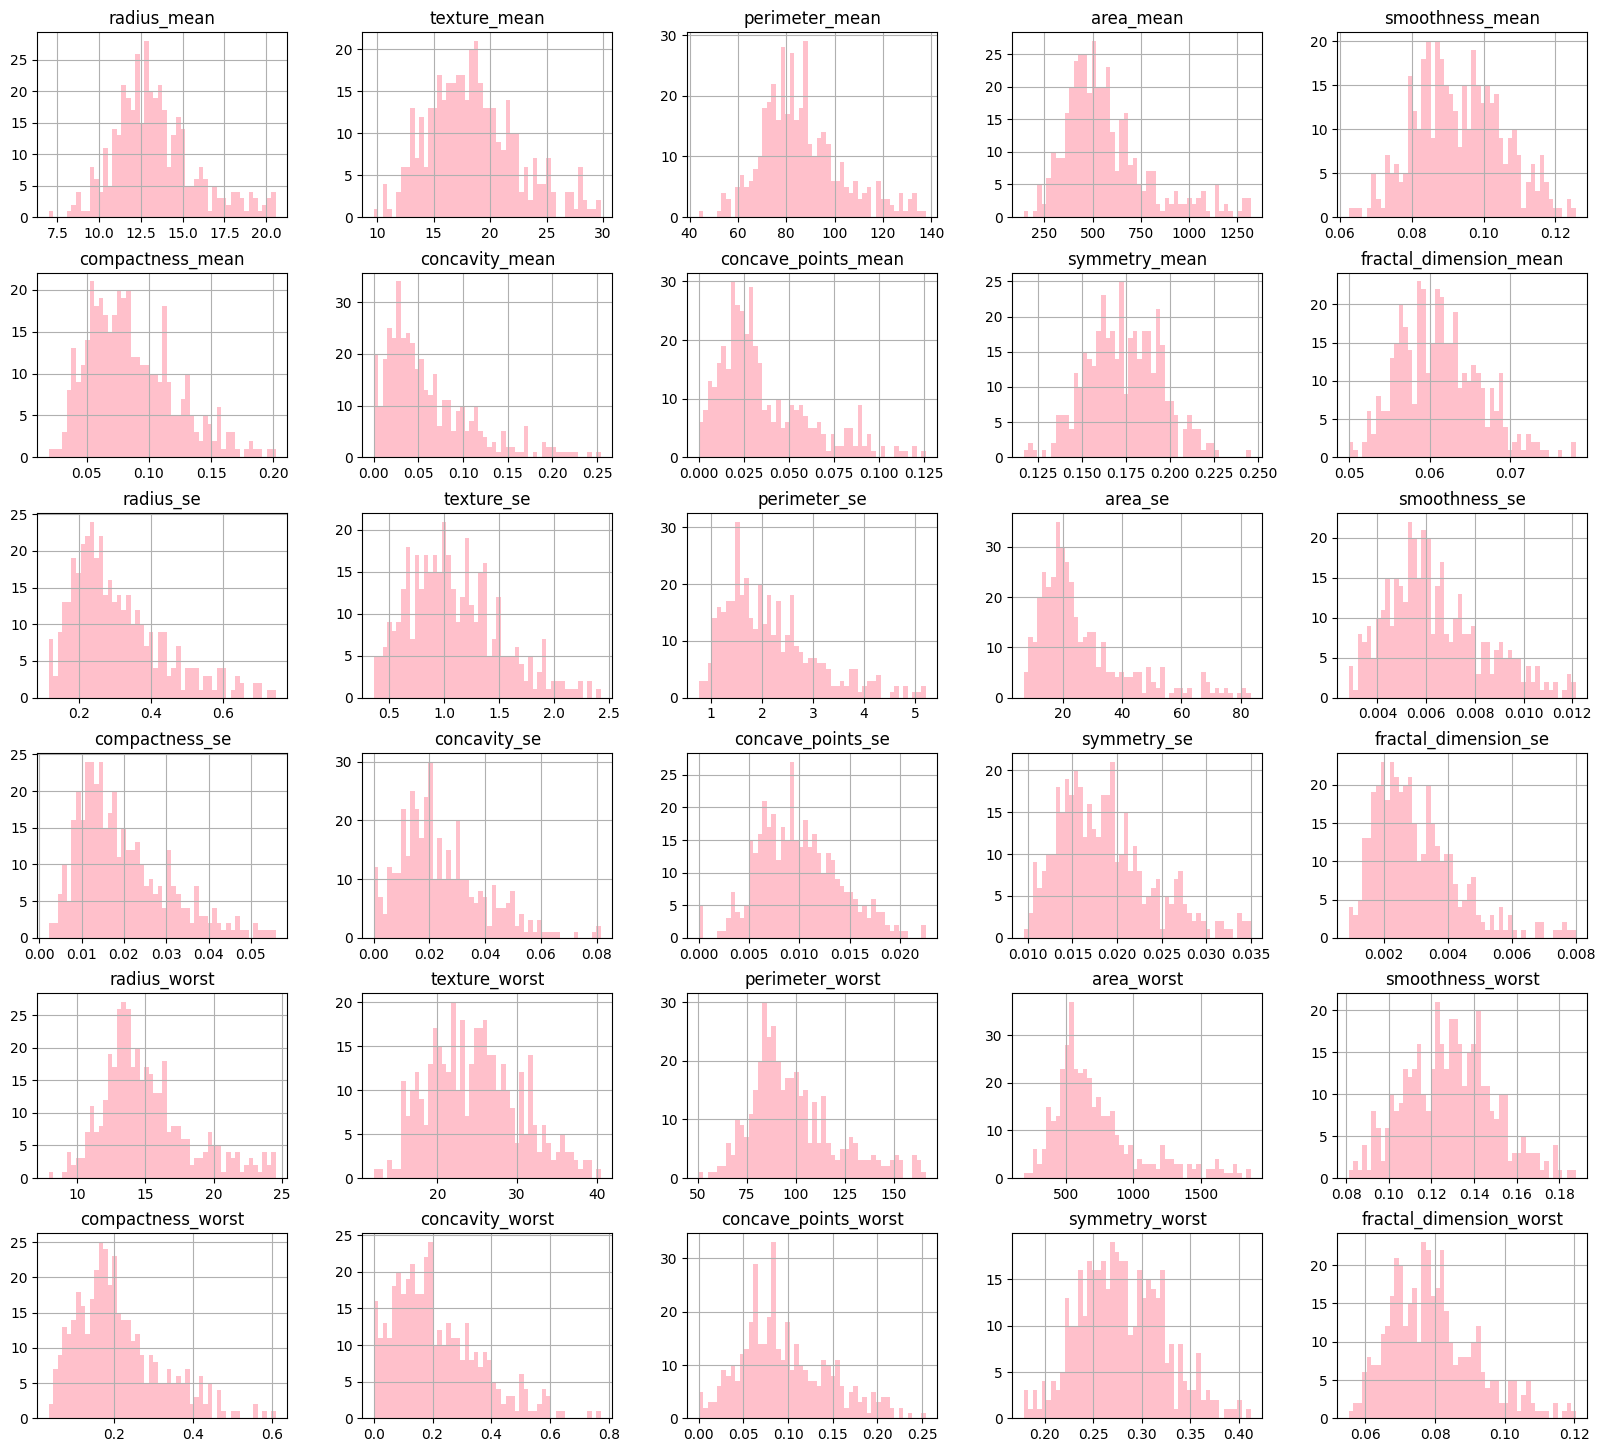

In [24]:
df_cleaned.hist(bins=50, figsize=(20, 18), color='pink');

<Axes: title={'center': 'Correlation Between Variables'}>

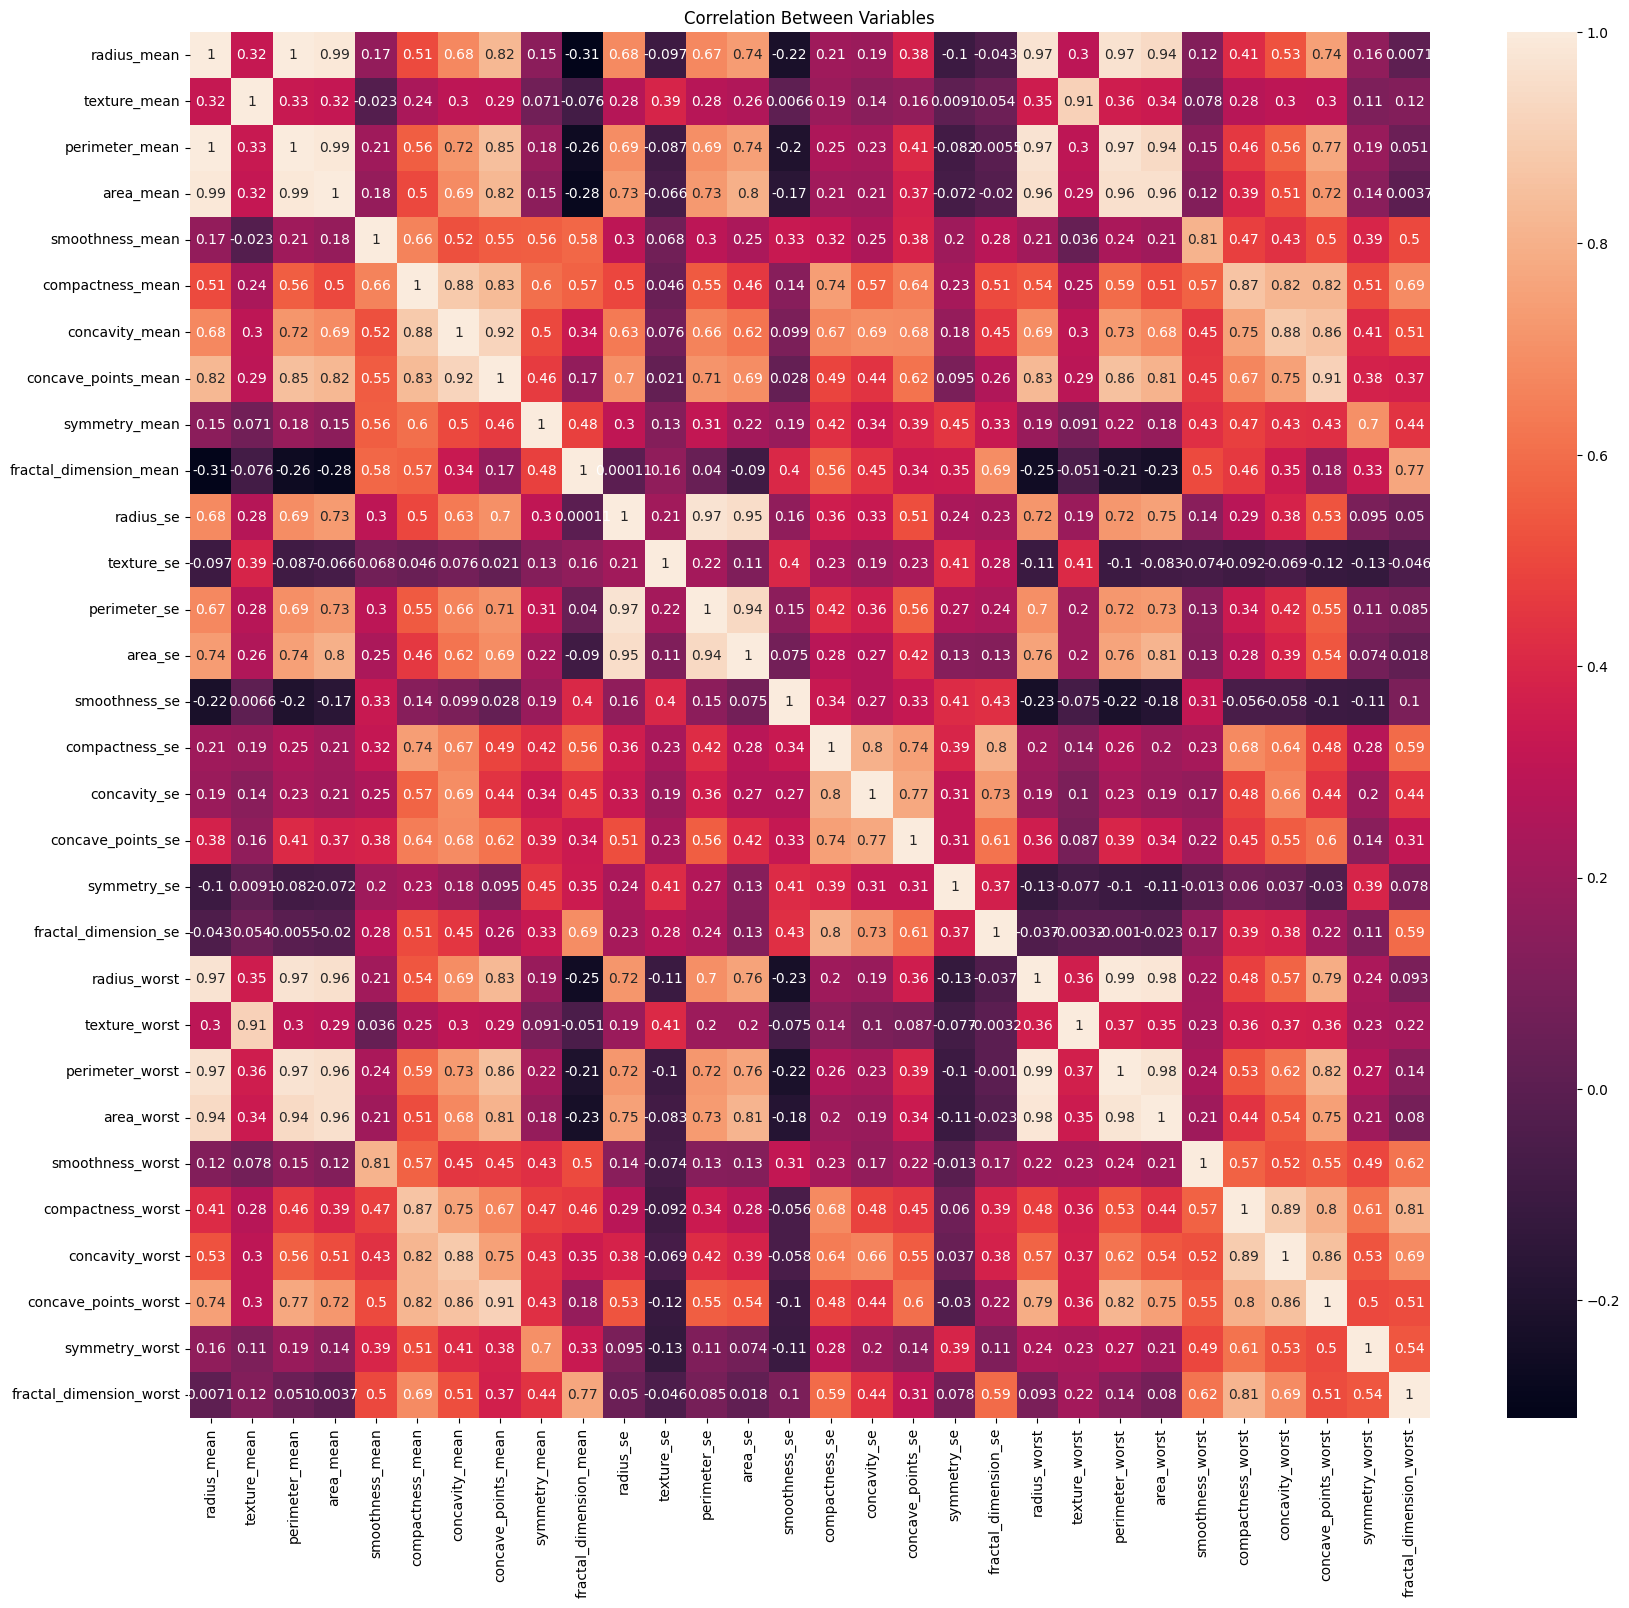

In [25]:
df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(20, 18))
plt.title('Correlation Between Variables')
sns.heatmap(data=df_numeric.corr(), annot=True)


<Axes: xlabel='diagnosis', ylabel='count'>

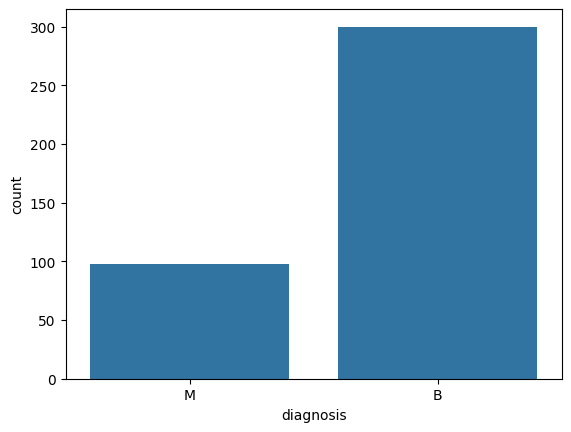

In [26]:

sns.countplot(x='diagnosis', data=df_cleaned)

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cleaned['diagnosis'] = le.fit_transform(df_cleaned['diagnosis'])


In [29]:
x = df_cleaned.drop(columns= 'diagnosis')
y = df_cleaned.diagnosis

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
(x_train.shape[0]/len(x))*100, (x_test.shape[0]/len(x))*100

(79.89949748743719, 20.100502512562816)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [32]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
print(confusion_matrix(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))
print(recall_score(y_test, y_pred_knn))
print(precision_score(y_test, y_pred_knn))

[[53  2]
 [ 5 20]]
0.9125
0.8
0.9090909090909091


<Axes: >

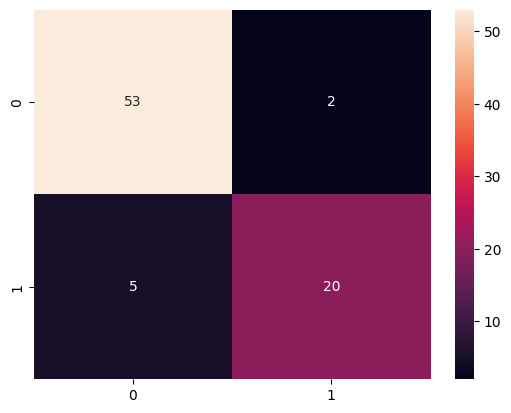

In [37]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d')

In [38]:
print(confusion_matrix(y_test, y_pred_svm))
print(accuracy_score(y_test, y_pred_svm))
print(recall_score(y_test, y_pred_svm))
print(precision_score(y_test, y_pred_svm))

[[55  0]
 [ 6 19]]
0.925
0.76
1.0


<Axes: >

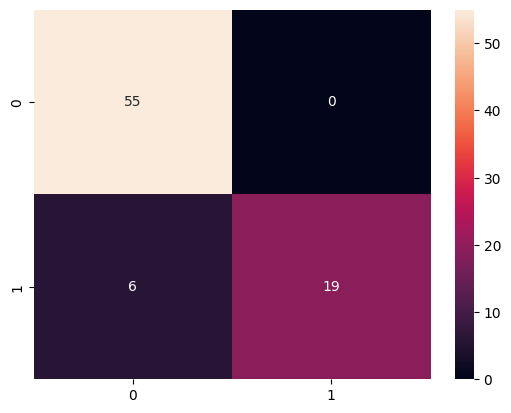

In [39]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d')

In [40]:
print(confusion_matrix(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_dt))
print(recall_score(y_test, y_pred_dt))
print(precision_score(y_test, y_pred_dt))

[[54  1]
 [ 4 21]]
0.9375
0.84
0.9545454545454546


<Axes: >

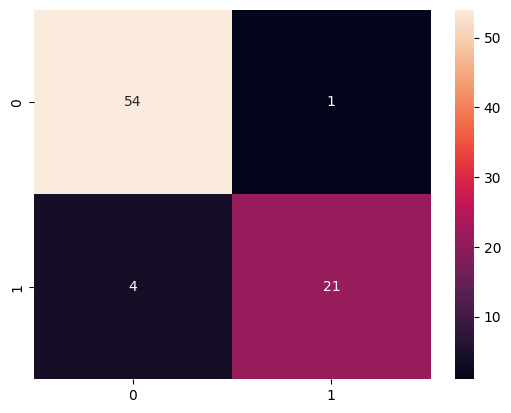

In [41]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d')